<a href="https://colab.research.google.com/github/gumindra/Polygon-Clipping-Algorithm-using-Cohen-Sutherland-Method-with-Visualization/blob/main/Polygon_Clipping_Algorithm_using_Cohen_Sutherland_Method_with_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

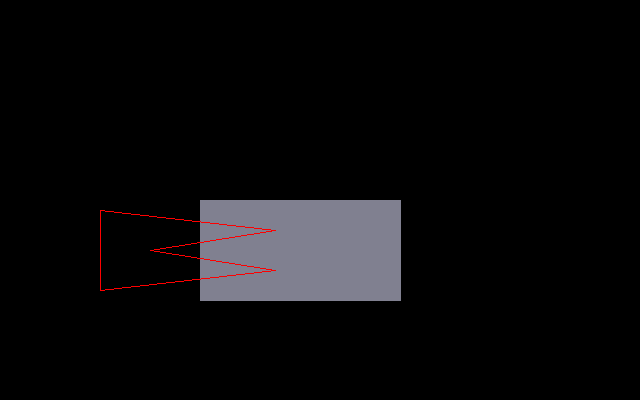

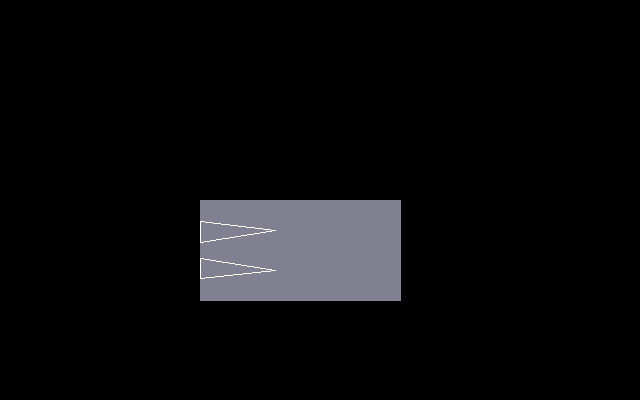

In [ ]:
import PIL.ImageDraw as ID
import PIL.Image as Image
import time

# im akan menampilkan tumpang tindih antar baris
# im1 akan menampilkan garis terpotong
im = Image.new("RGB", (640, 400))
im1 = Image.new("RGB", (640, 400))
draw2 = ID.Draw(im1)
draw = ID.Draw(im)
draw.polygon((200, 200, 400, 200, 400, 300, 200, 300), outline=(128, 128, 144), fill=(128, 128, 144))
draw2.polygon((200, 200, 400, 200, 400, 300, 200, 300), outline=(128, 128, 144), fill=(128, 128, 144))
p1 = (400.0, 300.0)
p4 = (200.0, 200.0)


def computeCode(x, y):
    code = 0
    if x < p4[0]:
        code = code | 1
    elif x > p1[0]:
        code = code | 2
    if y < p4[1]:
        code = code | 4
    elif y > p1[1]:
        code = code | 8
    return code


def lineClip(x1, y1, x2, y2):
    code1 = computeCode(x1, y1)
    code2 = computeCode(x2, y2)
    accept = False
    while True:
        if code1 == 0 and code2 == 0:
            accept = True
            break
        elif (code1 & code2) != 0:
            break;
        else:
            x = 1.0
            y = 1.0
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2
            if code_out & 8:
                x = x1 + (x2 - x1) * (p1[1] - y1) / (y2 - y1)
                y = p1[1]
            elif code_out & 4:
                x = x1 + (x2 - x1) * (p4[1] - y1) / (y2 - y1)
                y = p4[1]
            elif code_out & 2:
                y = y1 + (y2 - y1) * (p1[0] - x1) / (x2 - x1)
                x = p1[0]
            elif code_out & 1:
                y = y1 + (y2 - y1) * (p4[0] - x1) / (x2 - x1)
                x = p4[0]
            if code_out == code1:
                x1 = x
                y1 = y
                code1 = computeCode(x1, y1)
            else:
                x2 = x
                y2 = y
                code2 = computeCode(x2, y2)
    if accept:
        a = []
        p1 = (x1, y1)
        p2 = (x2, y2)
        a.append(p1)
        a.append(p2)
        draw.line((x1, y1, x2, y2), fill=(0, 0, 255))
        return a
    else:
        a = [(None, None), (None, None)]
        return a


def findNext(i, n, points):
    for j in range(i + 1, n):
        if (points[j][0] != None):
            return j


def polygonClip(n, points):
    count = 0
    flag = 0
    final = list()
    if (computeCode(points[n - 1][0], points[n - 1][1]) != 0):
        flag = 1
    for i in range(0, n - 1):
        start = [points[i][0], points[i][1]]
        end = [points[i + 1][0], points[i + 1][1]]
        if (computeCode(end[0], end[1]) == 0 and computeCode(start[0], start[1]) != 0):
            count = count + 1
            temp = []
            temp.append(None)
            temp.append(None)
            final.append(temp)
            count = count + 1

        a = lineClip(start[0], start[1], end[0], end[1])
        temp = []
        temp.append(a[0][0])
        temp.append(a[0][1])
        final.append(temp)
        count = count + 1
        temp = []
        temp.append(a[1][0])
        temp.append(a[1][1])
        final.append(temp)
        count = count + 1
        count = count - 1
    count = count + 1

    if (flag == 1):
        temp = []
        temp.append(None)
        temp.append(None)
        final.append(temp)
        count = count + 1

    startIndex = findNext(-1, count, final)
    start = [final[startIndex][0], final[startIndex][1]]
    flag = 0
    back = [start[0], start[1]]
    for i in range(startIndex + 1, count + 1):
        if (flag == 1 and final[i][0] != None):
            flag = 0
            if (final[i - 1][0] == None):
                back[0] = final[i][0]
                back[1] = final[i][1]
                continue

        if (final[i][0] == None):
            continue

        elif (final[i + 1][0] == None):
            draw.line((start[0], start[1], final[i][0], final[i][1]), fill=(255, 255, 255))
            draw.line((final[i][0], final[i][1], back[0], back[1]), fill=(255, 255, 255))
            if (i + 1 != count + 1):
                index = findNext(i, count, final)
                start[0] = final[index][0]
                start[1] = final[index][1]
            flag = 1

        else:
            draw.line((start[0], start[1], final[i][0], final[i][1]), fill=(255, 255, 255))
            start[0] = final[i][0]
            start[1] = final[i][1]
        if (final[i - 1][0] == None):
            back[0] = final[i][0]
            back[1] = final[i][1]
    im1.show()
    im1.save('Before clipping.png')
    im.show()
    im.save('After clipping.png')

if __name__ == '__main__':
    point = list()
    # Input diambil dalam kode
    # Algoritme dimulai dengan daftar input semua simpul dalam poligon yang disebutkan
    point = [[100, 290], [100, 210], [275, 230], [150, 250], [275, 270], [100, 290]]
    orig = list()
    for i in range(0, 10):
        orig.append(point[i // 2][i % 2])

    draw2.polygon(tuple(orig), outline=255)
    time.sleep(2)
    polygonClip(6, point)

